# 2023-07-26__AdEx_Nto1_we_I_syn

In [10]:
%run lib/Nto1.py

importing numpy, brian … ✔


In [11]:
set_seed(1)
*objs, net = Nto1(N=6500, vars_to_record=["V", "I", "ge", "gi", "w"])
net.store()

Ne=5200


In [12]:
net.restore()
we = 14 * pS
wi = we * 4
T = 1 * second
net.run(T, report='text')

Starting simulation at t=0. s for a duration of 1. s
1. s (100%) simulated in 4s


In [14]:
n, P, Se, Si, M, S, SP = objs;

In [31]:
%run lib/plot.py

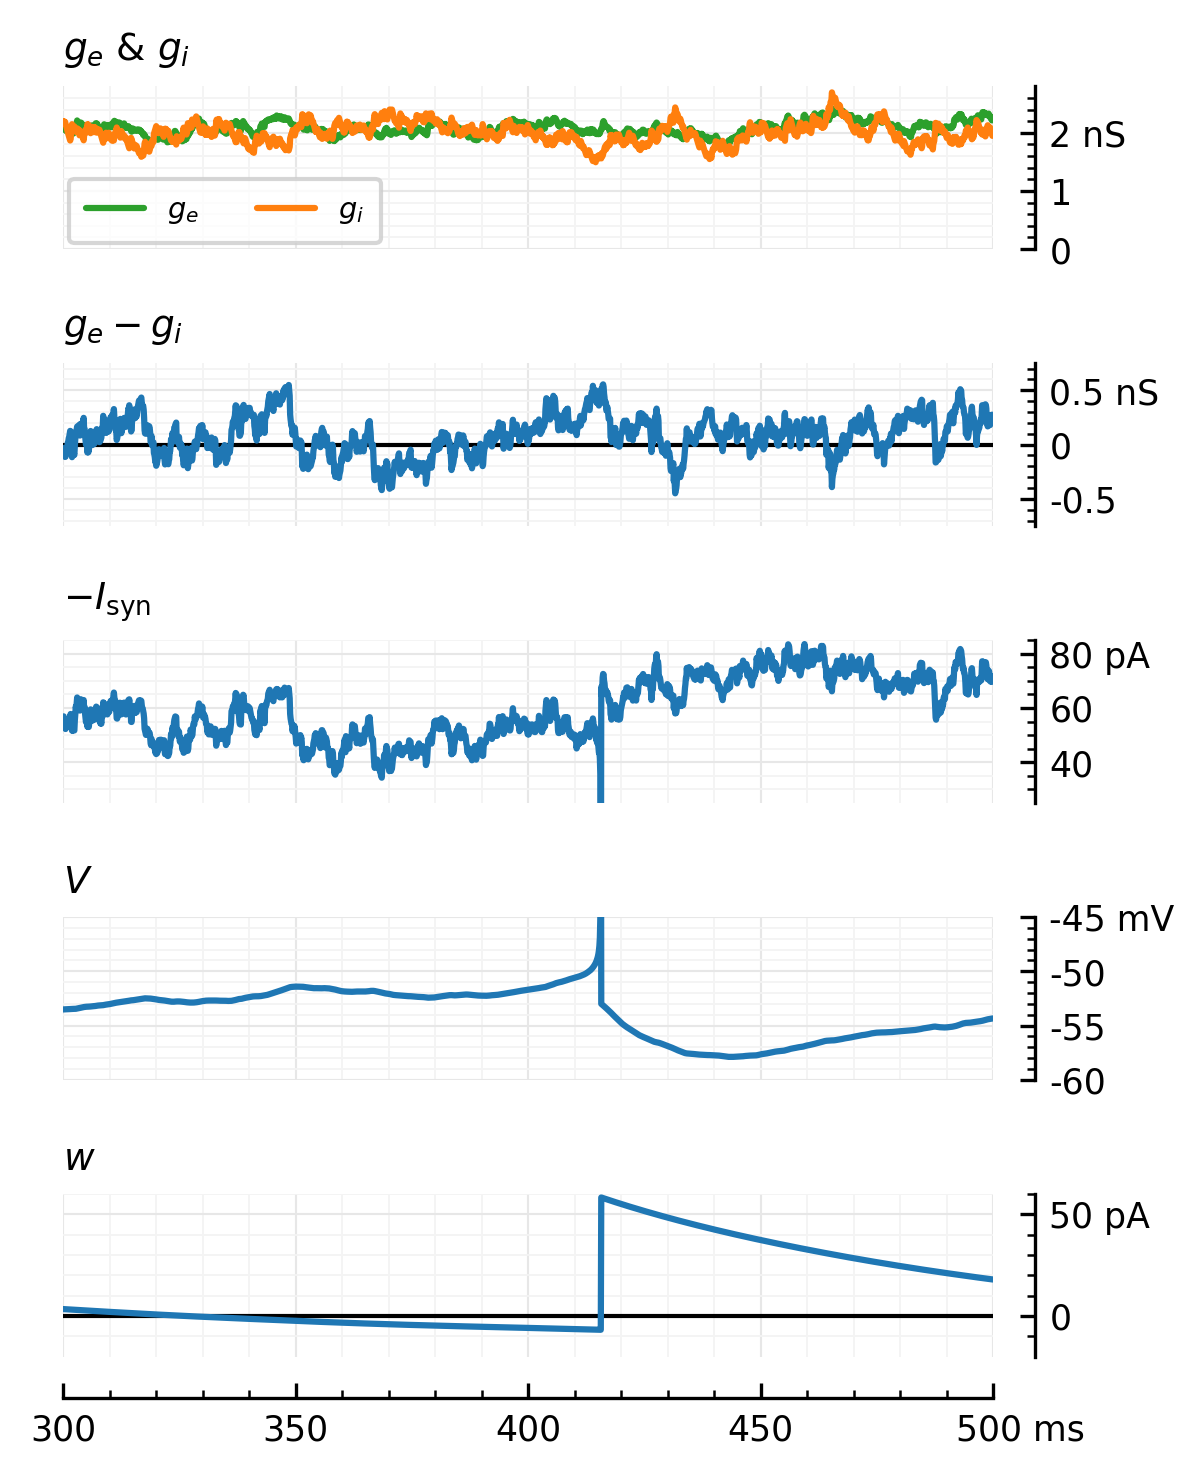

In [46]:
kw = dict(tlim = [300, 500]*ms, t_unit=ms, nbins_y=3, yaxloc="right")
fig, axs = plt.subplots(figsize=(4, 5.5), nrows=5, sharex=True, height_ratios=[1,1,1,1,1])
add_hline(axs[1])
add_hline(axs[-1])
plotsig(M.ge[0], "$g_e$ & $g_i$", **kw, ylim=[0, 2.8], ax=axs[0], color="C2", label="$g_e$")
plotsig(M.gi[0], None, **kw, ylim=[0, 2.8], ax=axs[0], color="C1", label="$g_i$")
axs[0].legend(loc="lower left", ncols=2, fontsize="x-small")
plotsig(M.ge[0] - M.gi[0], "$g_e - g_i$", **kw, ylim=[-.75,.75], ax=axs[1], y_unit=nS)
plotsig(-M.I[0], "$-I_\mathrm{syn}$", ylim=[25, 85], **kw, ax=axs[2])
plotsig(M.V[0], "$V$", **kw, ylim=[-60, -45], ax=axs[3])
plotsig(M.w[0], "$w$", **kw, ylim=[-20, 60], ax=axs[4], xlim=kw["tlim"]/ms)
axs[-1].set_xlabel(None)
for ax in axs[0:-1]:
    ax.set_xlabel(None)
    ax.spines["bottom"].set_visible(False)
    ax.tick_params(bottom=False, which='both')
plt.subplots_adjust(hspace=0.7)

In [47]:
savefig_thesis("all_sigs_6500", fig);

Saved at `../thesis/figs/all_sigs_6500.pdf`


## Impulse response

A single spike :)

In [1]:
from lib.neuron import *

importing numpy, brian … ✔


In [2]:
set_seed(2)

In [3]:
n = COBA_AdEx_neuron()

G = SpikeGeneratorGroup(1, [0], [50*ms])
S = Synapses(G, n, on_pre="ge += we")

In [4]:
S.connect()

In [5]:
vars_to_record=["V", "I", "ge", "w"]
M = StateMonitor(n, vars_to_record, record=[0])
net2 = Network([n, G, S, M])
net2.store()

In [6]:
net2.restore()
we = 14 * pS
wi = we * 4
T = 300 * ms
net2.run(T, report='text')

Starting simulation at t=0. s for a duration of 300. ms
300. ms (100%) simulated in < 1s


In [7]:
%run lib/plot.py

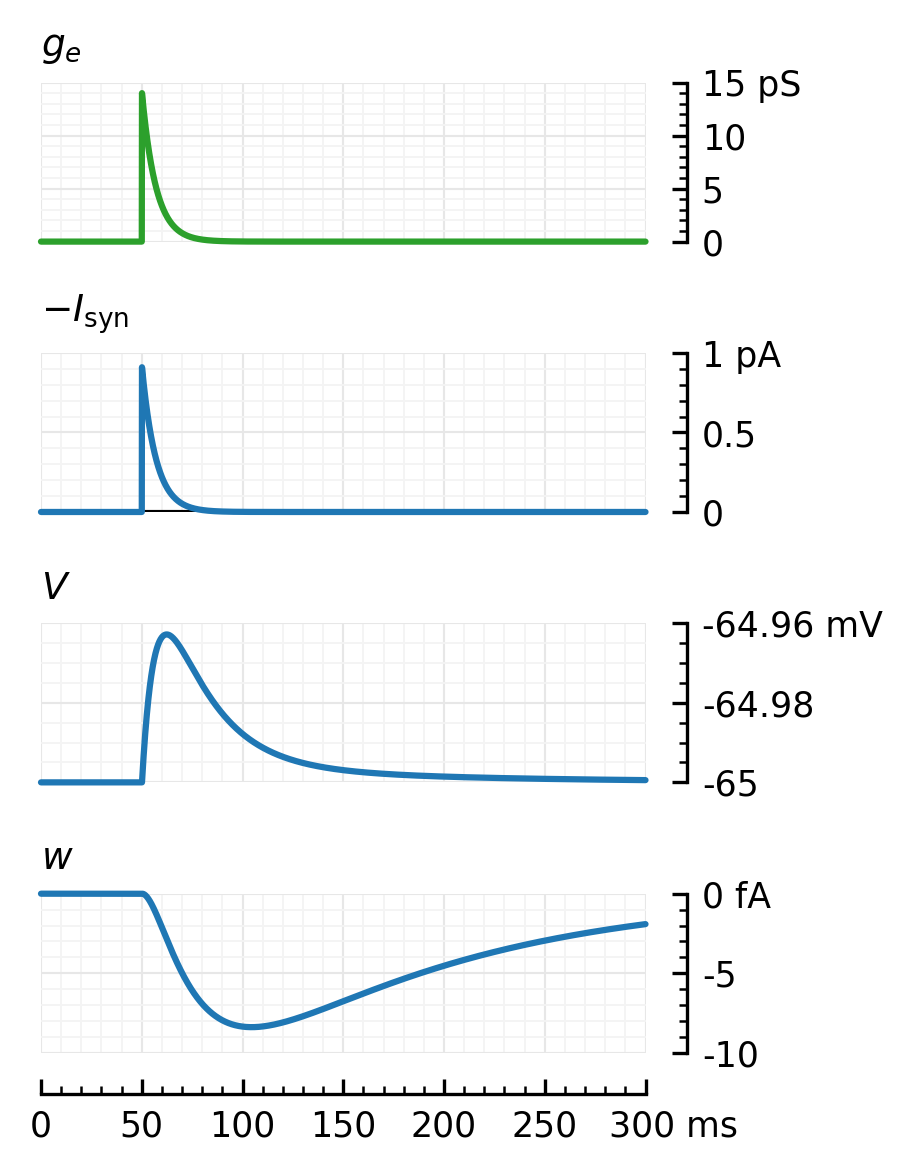

In [8]:
kw = dict(nbins_y=3, yaxloc="right", clip_on=False)
fig, axs = plt.subplots(figsize=(2.6, 4.2), nrows=4, sharex=True)
add_hline(axs[1])
plotsig(M.ge[0], "$g_e$", **kw, ax=axs[0], color="C2")
plotsig(-M.I[0], "$-I_\mathrm{syn}$", **kw, ax=axs[1])
plotsig(M.V[0], "$V$", **kw, ax=axs[2])
plotsig(M.w[0], "$w$", **kw, ax=axs[3])
axs[-1].set_xlabel(None)
for ax in axs[0:-1]:
    ax.set_xlabel(None)
    ax.spines["bottom"].set_visible(False)
    ax.tick_params(bottom=False, which='both')
plt.subplots_adjust(hspace=0.7)

In [9]:
savefig_thesis("impulse_response", fig)

Saved at `../thesis/figs/impulse_response.pdf`
